In [48]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
import matplotlib.pyplot as plt
import pypfopt.plotting as plotting
import yfinance as yf
from datetime import datetime
import pandas as pd

tickers = ['BPAN4.SA', 'BRAP3.SA', 'COGN3.SA', 'INTB3.SA', 'LREN3.SA', 'PTBL3.SA', 'QUAL3.SA', 'VALE3.SA', 'CSAN3.SA', 'MGLU3.SA', 'WEGE3.SA', 'CTGP34.SA','MSFT34.SA', 'UNHH34.SA']
start_date = '2024-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')
df = yf.download(tickers, start=start_date, end=end_date)
df = df.dropna()
df.head()

[*********************100%***********************]  14 of 14 completed


Price          Close                                                        \
Ticker      BPAN4.SA   BRAP3.SA  COGN3.SA   CSAN3.SA  CTGP34.SA   INTB3.SA   
Date                                                                         
2024-01-02  8.024095  18.909077  3.271392  18.566582  43.074867  19.639866   
2024-01-03  7.985517  18.998425  3.281128  18.643862  41.993214  19.809420   
2024-01-04  7.638321  18.819731  3.164293  18.392702  41.983639  19.592768   
2024-01-05  8.004807  18.624792  3.251919  18.537603  42.117653  19.668125   
2024-01-08  8.207337  18.364872  3.281128  18.856384  41.734760  20.214462   

Price                                                 ...    Volume           \
Ticker       LREN3.SA   MGLU3.SA  MSFT34.SA PTBL3.SA  ... CTGP34.SA INTB3.SA   
Date                                                  ...                      
2024-01-02  14.379308  18.614180  75.111862     6.99  ...     38380  1168300   
2024-01-03  14.111940  18.160175  74.923820     7.00  ...      2905  1064100   
2024-01-04  13.560499  17.524569  74.260796     6.49  ...      1088   782000   
2024-01-05  13.903061  17.887772  74.250893     6.76  ...      4483   577700   
2024-01-08  14.437795  18.977383  74.963417     6.92  ...       851   901200   

Price                                                                 \
Ticker      LREN3.SA  MGLU3.SA MSFT34.SA PTBL3.SA QUAL3.SA UNHH34.SA   
Date                                                                   
2024-01-02  18524550  12365563    108238   987100  5489900     32554   
2024-01-03  16300460   9247593     90517   686400  3498500     31267   
2024-01-04  16984550  13431857    181099  1182900  4604100     11407   
2024-01-05  14102330  15321653    181532   817000  4555500     17133   
2024-01-08  17168250  14712163     80713   636500  2662100     15640   

Price                          
Ticker      VALE3.SA WEGE3.SA  
Date                           
2024-01-02  18021800  3991200  
2024-01-03  25315100  6435500  
2024-01-04  18707000  5461100  
2024-01-05  21082500  9274700  
2024-01-08  23013300  3433300  

[5 rows x 70 columns]

In [49]:
df_close = df.loc[:, df.columns.get_level_values(level="Price") == 'Close']
df_close.columns = df_close.columns.droplevel(level="Price")
df_close.head()

Ticker,BPAN4.SA,BRAP3.SA,COGN3.SA,CSAN3.SA,CTGP34.SA,INTB3.SA,LREN3.SA,MGLU3.SA,MSFT34.SA,PTBL3.SA,QUAL3.SA,UNHH34.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,
2024-01-02,8.024095,18.909077,3.271392,18.566582,43.074867,19.639866,14.379308,18.614180,75.111862,6.99,3.220245,36.700260,65.572334,35.286442
2024-01-03,7.985517,18.998425,3.281128,18.643862,41.993214,19.809420,14.111940,18.160175,74.923820,7.00,3.270094,37.091099,65.231918,35.556610
2024-01-04,7.638321,18.819731,3.164293,18.392702,41.983639,19.592768,13.560499,17.524569,74.260796,6.49,3.130517,37.247440,64.355347,35.083813
2024-01-05,8.004807,18.624792,3.251919,18.537603,42.117653,19.668125,13.903061,17.887772,74.250893,6.76,3.270094,36.592781,63.529846,34.707504
2024-01-08,8.207337,18.364872,3.281128,18.856384,41.734760,20.214462,14.437795,18.977383,74.963417,6.92,3.309973,36.436440,63.206440,34.794342


In [50]:
mu = mean_historical_return(df_close)
S = CovarianceShrinkage(df_close).ledoit_wolf()

In [51]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

OrderedDict({'BPAN4.SA': 0.12972, 'BRAP3.SA': 0.0, 'COGN3.SA': 0.02307, 'CSAN3.SA': 0.0, 'CTGP34.SA': 0.53255, 'INTB3.SA': 0.0, 'LREN3.SA': 0.0, 'MGLU3.SA': 0.0, 'MSFT34.SA': 0.21919, 'PTBL3.SA': 0.0, 'QUAL3.SA': 0.0, 'UNHH34.SA': 0.0, 'VALE3.SA': 0.0, 'WEGE3.SA': 0.09548})


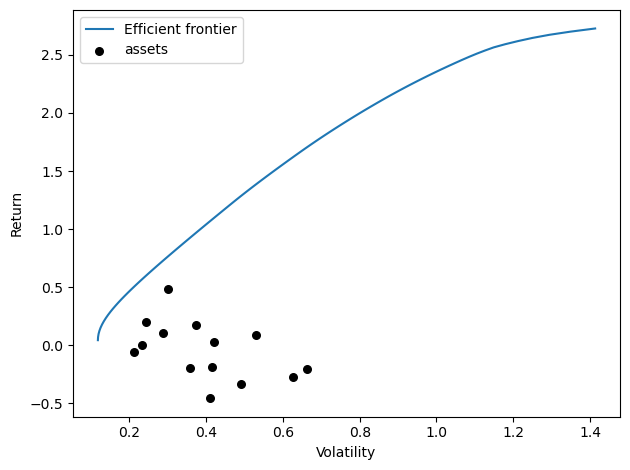

In [54]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

In [53]:
ef.portfolio_performance(verbose=True)

Expected annual return: 260.2%
Annual volatility: 153.0%
Sharpe Ratio: 1.70


(2.6016524755701833, 1.5304613195808956, 1.6999139032684765)